# **Comparison of Novelty/Outlier Detection Algorithms**

Developed by Jhonnatan Torres

### **Objective:**

The objective of this notebook is to compare the performance of a group of algorithms (estimators) used in Novelty/Outlier detection tasks

### **Data:**

For simplicity, the data to test these algorithms was generated by the random module of numpy, the first variable (**x**) was generated using a **uniform** distribution, the second variable (**y**) was generated using a **normal** distribution

In [0]:
import numpy as np
from collections import Counter
import pandas as pd

In [0]:
np.random.seed(1234)
x = np.random.uniform(0,100,size=5000)
print(x[0:5])

[19.15194504 62.2108771  43.7727739  78.53585837 77.99758081]


In [0]:
np.random.seed(1234)
y = np.random.normal(loc=30,scale=18,size=5000)
print(y[0:5])

[38.48583295  8.5624375  55.78872543 24.37226587 17.0294028 ]


In [0]:
Counter(y < 0)

Counter({False: 4755, True: 245})

In [0]:
label = np.where(y < 0, -1, 1)
print(Counter(label))

Counter({1: 4755, -1: 245})


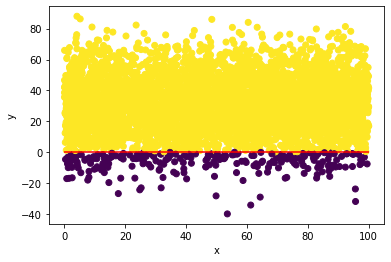

In [0]:
import matplotlib.pyplot as plt
plt.style.use('fast')
plt.scatter(x,y,c=label)
plt.xlabel('x')
plt.ylabel('y')
plt.hlines(y=0,xmin=np.min(x),xmax=np.max(x),colors='r')

All the algorithms tested in this notebook are known as "One Class" estimators, that means the training set contains only one class or label, in this case, the training set contains only positive observations (x > 0 , y > 0). The test set contains positive and negative observations. The idea is to detect the negative or unusual values of the entire data set.

In [0]:
data = np.column_stack([x,y,label])

In [0]:
df = pd.DataFrame(data=data,columns=['x','y','label'])

In [0]:
df.describe()

,x,y,label
count,5000.000000,5000.000000,5000.000000
mean,49.915240,30.436992,0.902000
std,29.067718,17.853731,0.431779
min,0.002591,-39.856171,-1.000000
25%,24.227282,18.374116,1.000000
50%,50.641983,30.480237,1.000000
75%,75.215819,42.476982,1.000000
max,99.996372,87.970232,1.000000


Positive observations were assigned to the training set

In [0]:
train = df[df["label"] == 1]
print(train.shape)

(4755, 3)


In [0]:
train.describe()

,x,y,label
count,4755.000000,4755.000000,4755.0
mean,50.060714,32.351463,1.0
std,29.012490,16.068629,0.0
min,0.002591,0.180968,1.0
25%,24.460053,20.465063,1.0
50%,50.757449,31.512800,1.0
75%,75.215955,43.063700,1.0
max,99.996372,87.970232,1.0


### **Models:**

Based in the sklearn documentation, the models tested in this notebook are **Isolation Forest**, **LocalIsolationFactor** and a couple of **OneClassSVM** using a *Linear* and *RBF* Kernels. 

All estimators were trained using default parameters

In [0]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
iso_forest = IsolationForest(n_estimators=100,random_state=1234,verbose=1)
iso_forest.fit(train.drop(columns=['label']))
iso_forest_predictions = iso_forest.predict(df.drop(columns=['label']))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [0]:
lof = LocalOutlierFactor(n_neighbors=27, leaf_size=30, novelty=True)
lof.fit(train.drop(columns=['label']))
lof_predictions = lof.predict(df.drop(columns=['label']))

In [0]:
ocsvm_rbf = OneClassSVM(kernel='rbf',gamma='scale', nu=0.5)
ocsvm_rbf.fit(train.drop(columns=['label']))
ocsvm_rbf_predictions = ocsvm_rbf.predict(df.drop(columns=['label']))

In [0]:
ocsvm_linear = OneClassSVM(kernel='linear',gamma='scale', nu=0.5)
ocsvm_linear.fit(train.drop(columns=['label']))
ocsvm_linear_predictions = ocsvm_linear.predict(df.drop(columns=['label']))

### **Performance:**

Based in **Accuracy** and **Precision** performance metrics, the best model was the **LocalOutlierFactor**

In [0]:
print("******Isolation Forest Performance******")
print("Classification Report:")
print("------------------------")
print(classification_report(df['label'],iso_forest_predictions))
print("Confusion Matrix:")
print("------------------------")
print(confusion_matrix(df['label'],iso_forest_predictions))

******Isolation Forest Performance******
Classification Report:
------------------------
              precision    recall  f1-score   support

        -1.0       0.12      1.00      0.21       245
         1.0       1.00      0.62      0.77      4755

    accuracy                           0.64      5000
   macro avg       0.56      0.81      0.49      5000
weighted avg       0.96      0.64      0.74      5000

Confusion Matrix:
------------------------
[[ 245    0]
 [1792 2963]]


In [0]:
print("******Local Outlier Factor******")
print("Classification Report:")
print("------------------------")
print(classification_report(df['label'],lof_predictions))
print("Confusion Matrix:")
print("------------------------")
print(confusion_matrix(df['label'],lof_predictions))

******Local Outlier Factor******
Classification Report:
------------------------
              precision    recall  f1-score   support

        -1.0       0.94      0.68      0.79       245
         1.0       0.98      1.00      0.99      4755

    accuracy                           0.98      5000
   macro avg       0.96      0.84      0.89      5000
weighted avg       0.98      0.98      0.98      5000

Confusion Matrix:
------------------------
[[ 166   79]
 [  10 4745]]


In [0]:
print("******OneClass SVM RBF Kernel******")
print("Classification Report:")
print("------------------------")
print(classification_report(df['label'],ocsvm_rbf_predictions))
print("Confusion Matrix:")
print("------------------------")
print(confusion_matrix(df['label'],ocsvm_rbf_predictions))

******OneClass SVM RBF Kernel******
Classification Report:
------------------------
              precision    recall  f1-score   support

        -1.0       0.09      1.00      0.17       245
         1.0       1.00      0.50      0.67      4755

    accuracy                           0.52      5000
   macro avg       0.55      0.75      0.42      5000
weighted avg       0.96      0.52      0.64      5000

Confusion Matrix:
------------------------
[[ 245    0]
 [2377 2378]]


In [0]:
print("******OneClass SVM Linear Kernel******")
print("Classification Report:")
print("------------------------")
print(classification_report(df['label'],ocsvm_linear_predictions))
print("Confusion Matrix:")
print("------------------------")
print(confusion_matrix(df['label'],ocsvm_linear_predictions))

******OneClass SVM Linear Kernel******
Classification Report:
------------------------
              precision    recall  f1-score   support

        -1.0       0.09      0.91      0.16       245
         1.0       0.99      0.50      0.66      4755

    accuracy                           0.52      5000
   macro avg       0.54      0.71      0.41      5000
weighted avg       0.95      0.52      0.64      5000

Confusion Matrix:
------------------------
[[ 224   21]
 [2376 2379]]


### **Predictions:**

Based in the graphical representation of the predictions generated by the estimators, it can be observed the **LocalOutlierFactor** is doing a good job detecting the negative observations (y < 0) and the extreme positive observations (y > 75)

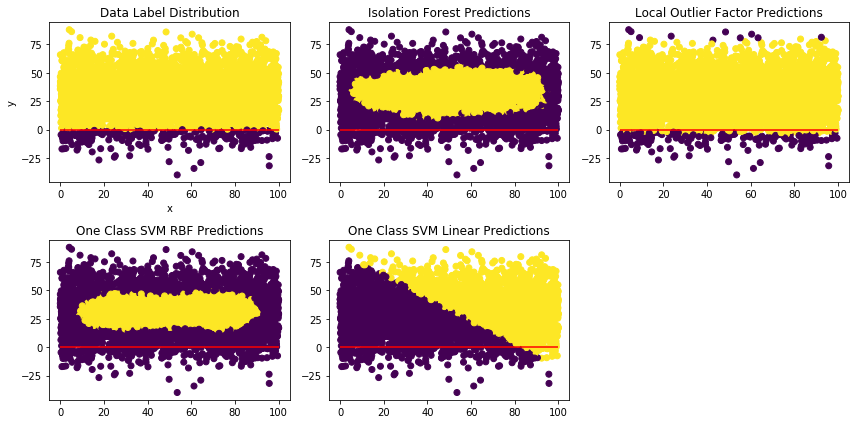

In [0]:
plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
plt.scatter(x=x,y=y,c=label)
plt.hlines(y=0,xmin=np.min(x),xmax=np.max(x),colors='r')
plt.title("Data Label Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(2,3,2)
plt.scatter(x=x,y=y,c=iso_forest_predictions)
plt.hlines(y=0,xmin=np.min(x),xmax=np.max(x),colors='r')
plt.title("Isolation Forest Predictions")
plt.subplot(2,3,3)
plt.scatter(x=x,y=y,c=lof_predictions)
plt.hlines(y=0,xmin=np.min(x),xmax=np.max(x),colors='r')
plt.title("Local Outlier Factor Predictions")
plt.subplot(2,3,4)
plt.scatter(x=x,y=y,c=ocsvm_rbf_predictions)
plt.hlines(y=0,xmin=np.min(x),xmax=np.max(x),colors='r')
plt.title("One Class SVM RBF Predictions")
plt.subplot(2,3,5)
plt.scatter(x=x,y=y,c=ocsvm_linear_predictions)
plt.hlines(y=0,xmin=np.min(x),xmax=np.max(x),colors='r')
plt.title("One Class SVM Linear Predictions")
plt.tight_layout()
plt.show()